In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [23]:
# Load dataset (upload to Colab first if needed)
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Basic info
print(df.info())
print(df.describe())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [24]:
df.drop('customerID', axis=1, inplace=True)

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


df.dropna(inplace=True)


le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])


In [4]:
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

results = []

# Train and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append((name, acc))

    print(f"\n📊 {name} Results:")
    print("Accuracy:", acc)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



📊 Logistic Regression Results:
Accuracy: 0.7853589196872779
Confusion Matrix:
 [[920 113]
 [189 185]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.79      0.78      1407


📊 Decision Tree Results:
Accuracy: 0.7192608386638237
Confusion Matrix:
 [[820 213]
 [182 192]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.79      0.81      1033
           1       0.47      0.51      0.49       374

    accuracy                           0.72      1407
   macro avg       0.65      0.65      0.65      1407
weighted avg       0.73      0.72      0.72      1407


📊 Random Forest Results:
Accuracy: 0.7910447761194029
Confusion Matrix:
 [[937  96]
 [198 176]]
C

<ipython-input-6-022e6739b25f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="Accuracy", y="Model", palette="mako")


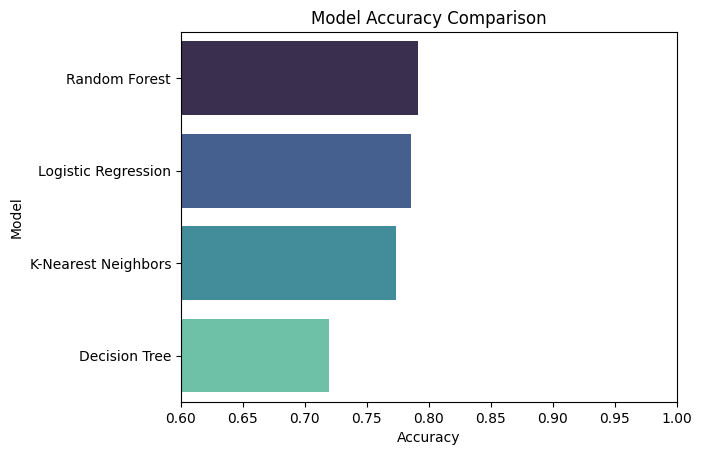

In [6]:
# Create results DataFrame
results_df = pd.DataFrame(results, columns=["Model", "Accuracy"]).sort_values(by="Accuracy", ascending=False)

# Plot
sns.barplot(data=results_df, x="Accuracy", y="Model", palette="mako")
plt.title("Model Accuracy Comparison")
plt.xlim(0.6, 1.0)
plt.show()


**VISUALIZATION**

<ipython-input-7-9347006e1c72>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn', palette='Set2')


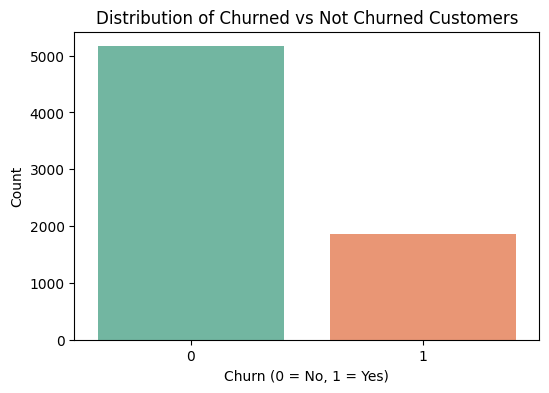

In [7]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Churn', palette='Set2')
plt.title('Distribution of Churned vs Not Churned Customers')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


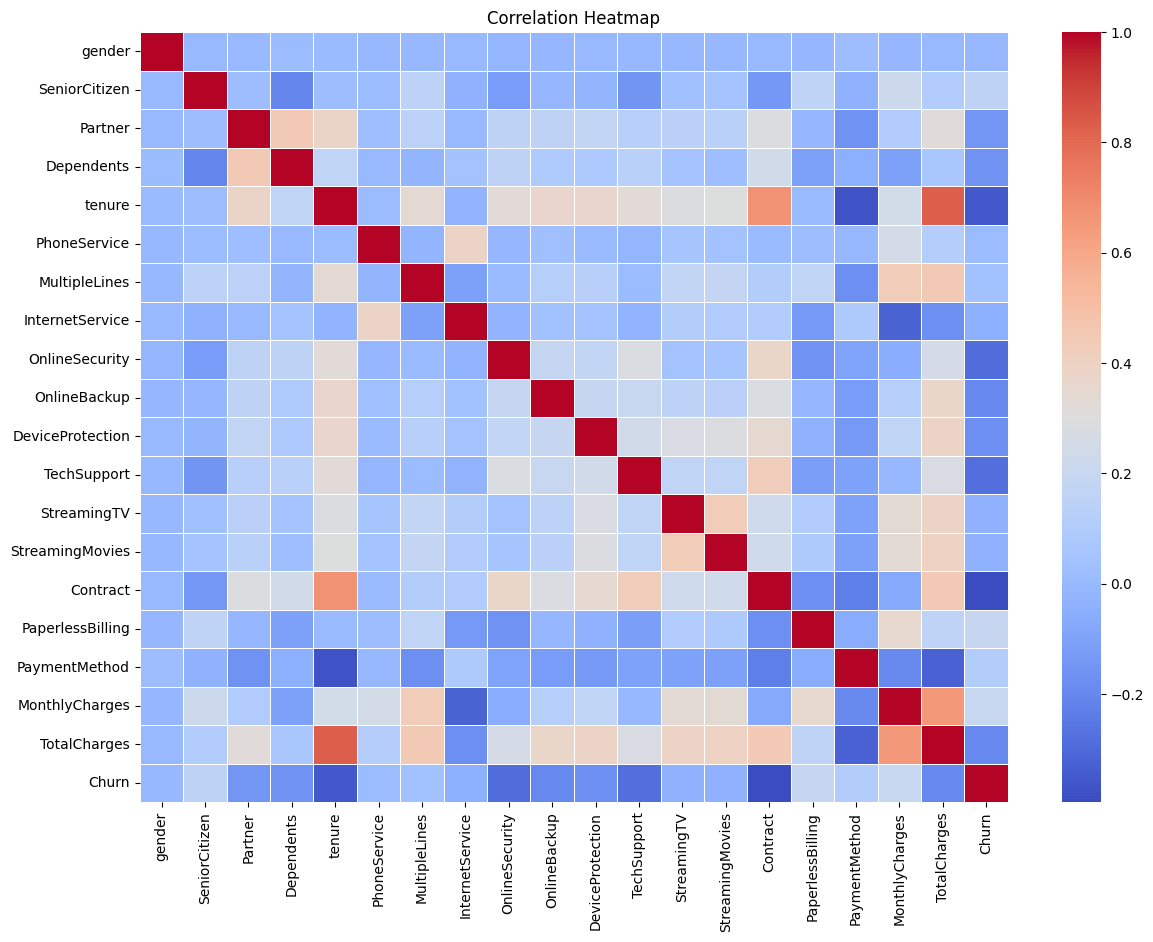

In [11]:
plt.figure(figsize=(14,10))
corr = df.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


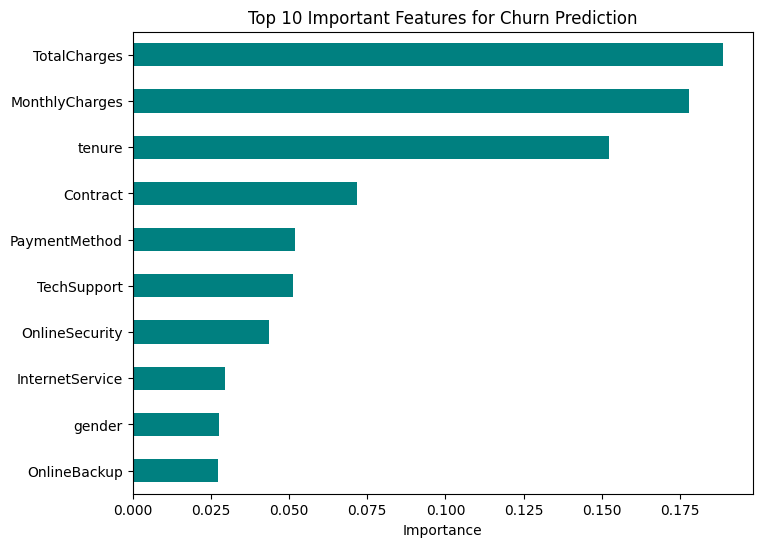

In [12]:
# Train Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Plot feature importances
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh', figsize=(8,6), color='teal')
plt.title('Top 10 Important Features for Churn Prediction')
plt.xlabel('Importance')
plt.gca().invert_yaxis()
plt.show()


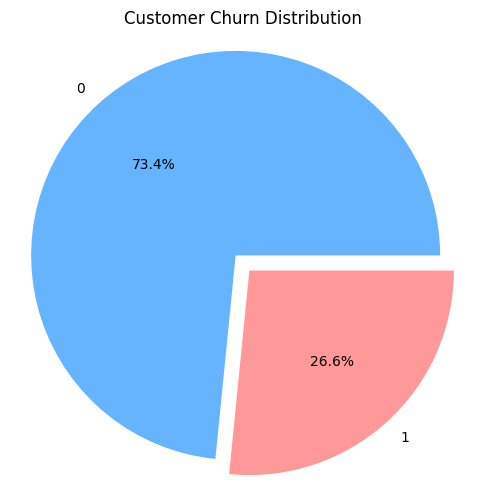

In [15]:
import matplotlib.pyplot as plt

# Pie chart for churn distribution
churn_counts = df['Churn'].value_counts()
labels = churn_counts.index
sizes = churn_counts.values
colors = ['#66b3ff','#ff9999']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, explode=(0, 0.1))
plt.title('Customer Churn Distribution')
plt.axis('equal')
plt.show()



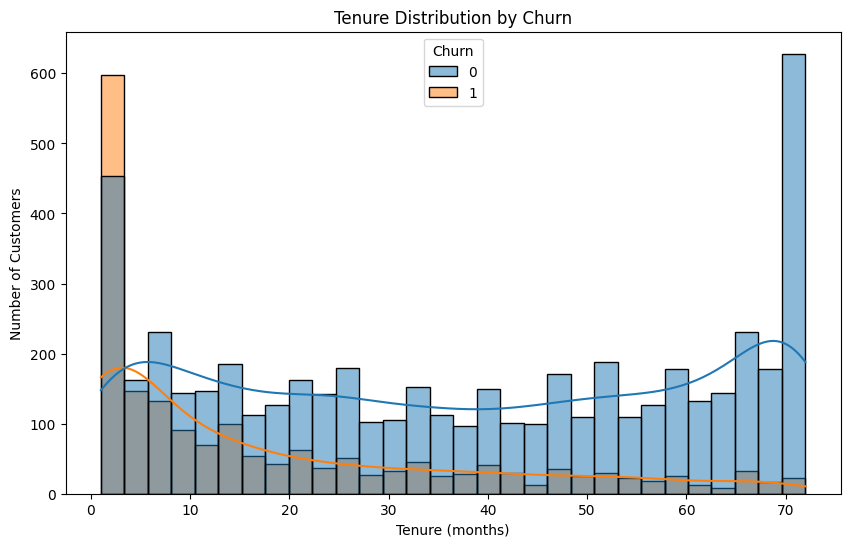

In [17]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='tenure', hue='Churn', bins=30, kde=True)
plt.title('Tenure Distribution by Churn')
plt.xlabel('Tenure (months)')
plt.ylabel('Number of Customers')
plt.show()


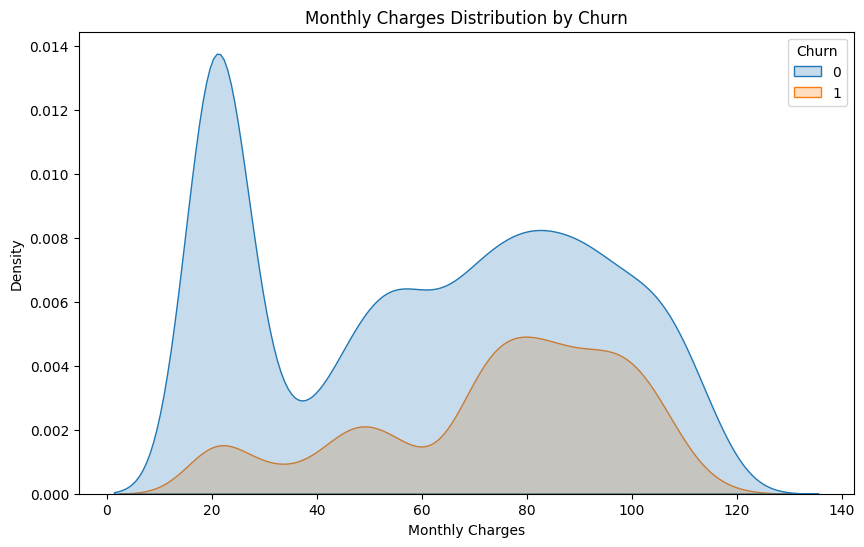

In [18]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x="MonthlyCharges", hue="Churn", fill=True)
plt.title("Monthly Charges Distribution by Churn")
plt.xlabel("Monthly Charges")
plt.ylabel("Density")
plt.show()


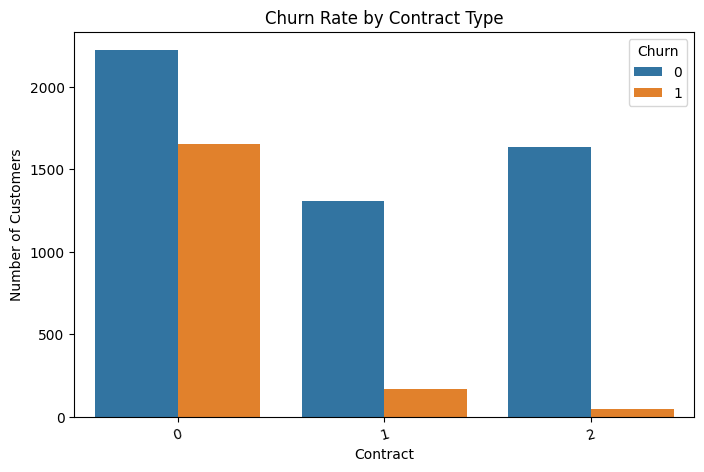

In [19]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Contract", hue="Churn")
plt.title("Churn Rate by Contract Type")
plt.ylabel("Number of Customers")
plt.xticks(rotation=15)
plt.show()


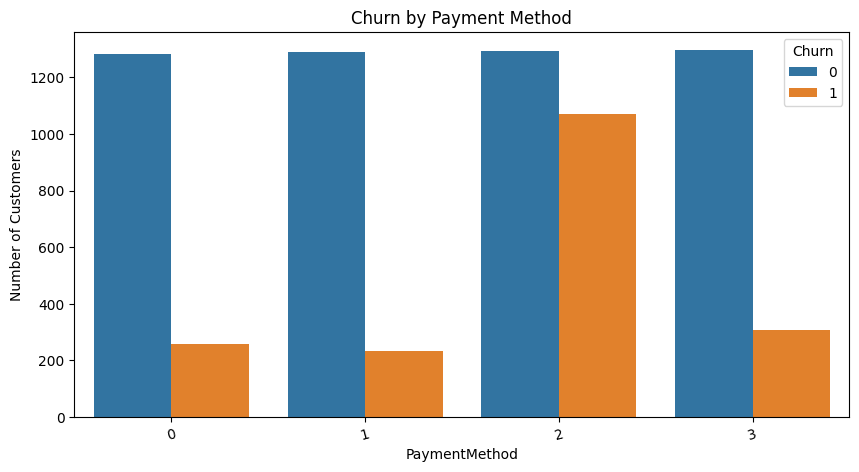

In [20]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="PaymentMethod", hue="Churn")
plt.title("Churn by Payment Method")
plt.ylabel("Number of Customers")
plt.xticks(rotation=15)
plt.show()
